# Analyzing the data and cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Cleaning data.

data = pd.read_csv('./Liiklusõnnetused_2011_2021.csv')

#Generate descriptive statistics.

numerical_summary = data.describe()
pd.set_option('display.max_columns', None)
numerical_summary

,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Kergliikurijuhi osalusel,Jalakäija osalusel,Kaassõitja osalusel,Maastikusõiduki juhi osalusel,Eaka (65+) mootorsõidukijuhi osalusel,Bussijuhi osalusel,Veoautojuhi osalusel,Ühissõidukijuhi osalusel,Sõiduautojuhi osalusel,Mootorratturi osalusel,Mopeedijuhi osalusel,Jalgratturi osalusel,Alaealise osalusel,Turvavarustust mitte kasutanud isiku osalusel,Esmase juhiloa omaniku osalusel,Mootorsõidukijuhi osalusel,Tüüpskeemi nr,Lubatud sõidukiirus (PPA),Tee nr (PPA),GPS X,GPS Y
count,15633.000000,15708.000000,15708.000000,15633.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15245.000000,15164.000000,4.749000e+03,1.346400e+04,1.345900e+04
mean,1.928037,0.048765,1.216387,1.497793,0.014265,0.245325,0.256506,0.006618,0.112639,0.055516,0.101716,0.065926,0.722162,0.066697,0.039131,0.151192,0.173874,0.119193,0.087965,0.883891,359.209052,60.680955,7.595548e+03,6.538844e+06,5.809568e+05
std,1.022584,0.235166,0.816581,0.764830,0.118583,0.430294,0.436718,0.081086,0.316161,0.228993,0.302284,0.248160,0.447948,0.249504,0.193913,0.358247,0.379013,0.324026,0.283253,0.320366,250.243224,21.988954,5.825822e+04,1.545420e+05,1.219702e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,0.000000,1.000000e+00,6.516710e+05,3.690000e+05
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,50.000000,5.000000e+00,6.474984e+06,5.390980e+05
50%,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,206.000000,50.000000,4.700000e+01,6.581461e+06,5.470430e+05
75%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,502.000000,90.000000,1.410400e+04,6.588579e+06,6.381190e+05
max,24.000000,4.000000,23.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,901.000000,2.921029e+06,6.635000e+06,6.472967e+06


In [3]:
# Checking data types and missing values

data_types_missing = pd.DataFrame({
    'Data Type': data.dtypes,
    'Missing Values': data.isnull().sum(),
    'Percentage Missing': (data.isnull().sum() / len(data)) * 100
})

 # Displaying the first 10 columns for data types and missing values info
data_types_missing

,Data Type,Missing Values,Percentage Missing
Juhtumi nr,object,0,0.000000
Toimumisaeg,object,0,0.000000
Isikuid,float64,75,0.477464
Hukkunuid,int64,0,0.000000
Vigastatuid,int64,0,0.000000
Sõidukeid,float64,75,0.477464
Aadress (PPA),object,1107,7.047364
Maja nr (PPA),object,9022,57.435702
Tänav (PPA),object,1696,10.797046
Ristuv tänav (PPA),object,12951,82.448434


In [4]:
#Dropping columns with too many missing values and columns which hold no significance.

too_much_missing=['Sõiduradade arv','Ristuv tänav (PPA)','Maja nr (PPA)','Sõiduradade arv','Tee km (PPA)','Tee nr (PPA)','Asustus (PPA)']
no_significance = ['Juhtumi nr','Aadress (PPA)']

data.drop(columns=too_much_missing, inplace=True)
data.drop(columns=no_significance, inplace=True)

In [5]:
# missing values in target variable

# Calculate the percentage of 'Teadmata' occurrences
teadmata_percentage = (data['Liiklusõnnetuse liik [1]'].eq('Teadmata').sum() / len(data)) * 100
print(f"The percentage of 'Teadmata' in Liiklusõnnetusetüüp [1] column: {teadmata_percentage:.2f}%\n")

teadmata_percentage = (data['Liiklusõnnetuse liik [3]'].eq('Teadmata').sum() / len(data)) * 100
print(f"The percentage of 'Teadmata' in Liiklusõnnetusetüüp [3] column: {teadmata_percentage:.2f}%\n")

data_with_teadmata_values=data.copy()

data = data[data['Liiklusõnnetuse liik [1]'] != 'Teadmata']
data = data[data['Liiklusõnnetuse liik [3]'] != 'Teadmata']
data = data.reset_index(drop=True)

The percentage of 'Teadmata' in Liiklusõnnetusetüüp [1] column: 0.56%

The percentage of 'Teadmata' in Liiklusõnnetusetüüp [3] column: 0.56%



In [6]:
#How does the transport authority categorize traffic incidents?

print("From 2011 - 2021, these were the different kinds of accident types logged by the Estonian Transport Authority")

for type, count in data['Tüüpskeem [2]'].value_counts().items():
    print(type, "(count: ", count, ")\n")

From 2011 - 2021, these were the different kinds of accident types logged by the Estonian Transport Authority
Sõiduk kaotab teelõigul või ristmikul juhitavuse ning kaldub kavandatud kursist paremale teelt välja või vastassuuna vööndisse. (count:  1584 )

Sõiduk kaotab teelõigul või ristmikul juhitavuse ning kaldub kavandatud kursist vasakule vastassuuna vööndisse või teelt välja. (count:  1215 )

Konflikt samas suunas otse sõitvate sõidukite vahel teelõigul või ristmiku peateel. (count:  1103 )

Ristmiku peateel otse sõitva sõiduki konflikt paremalt poolt kõrvalteelt tuleva sõidukiga. (count:  1036 )

Sõiduki konflikt teelõiku paremalt poolt ületava jalakäijaga. (count:  953 )

Sõiduk kaotab teelõigul või ristmikul juhitavuse ning paiskub ümber. (count:  929 )

Muu liikluskonflikt. (count:  872 )

Ristmiku peateel otse sõitva sõiduki konflikt vasakult poolt kõrvalteelt tuleva sõidukiga. (count:  800 )

Konflikt vastassuundadest otse sõitvate sõidukite vahel teelõigul või ristmiku peate

The amount of registered cars in Estonia from 2011 to 2021, has grown from 732457 to 1099789 (according to CEIC data).

Interestingly, the amount of traffic incidents reported has stayed consistent.


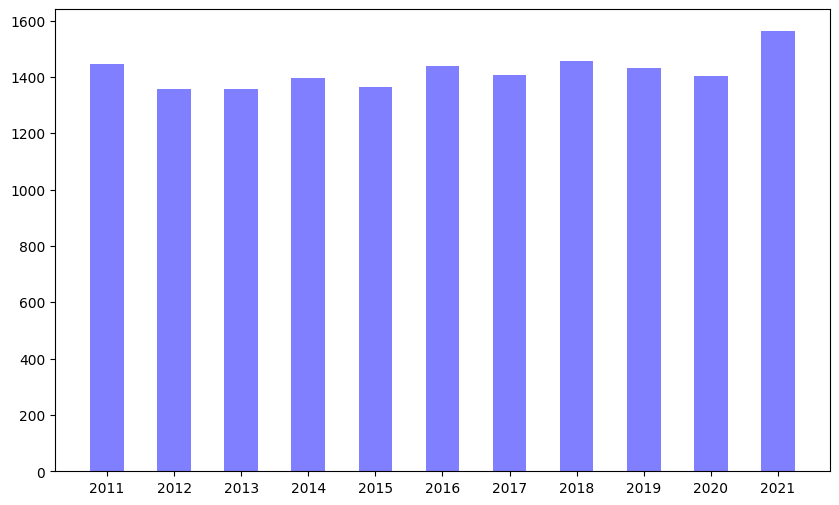

In [7]:
#Normalize dates
def parseTimes(row):
    if "/" in row:
        rowParts = row.split("/")
        if len(rowParts[0]) == 1:
            rowParts[0] = "0" + rowParts[0]
        if len(rowParts[1]) == 1:
            rowParts[1] = "0" + rowParts[1]

        return rowParts[0] + "." + rowParts[1] + "." + "20" + rowParts[2]
    else:
        return row

data['Toimumisaeg'] = data['Toimumisaeg'].apply(parseTimes)

def extract_year(string):
    year = string[-4:]
    if ':' in year:
        return string[6:10]
    return year

accident_years = data['Toimumisaeg'].apply(extract_year).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(accident_years.index, accident_years.values, color='blue', alpha=0.5, width=0.5)

print("The amount of registered cars in Estonia from 2011 to 2021, has grown from 732457 to 1099789 (according to CEIC data).\n")
print("Interestingly, the amount of traffic incidents reported has stayed consistent.")


In [8]:
rows_before = len(data)

data = data.dropna()

rows_after = len(data)
print("Rows before dropping NaN values:", rows_before)
print("Rows after dropping NaN values:", rows_after)
print("Rows lost:", rows_before - rows_after)

# making a copy of the data so that changes in the model part of the project do not affect the outcomes in other parts
dfcopy=data.copy()


Rows before dropping NaN values: 15620
Rows after dropping NaN values: 11628
Rows lost: 3992


In [9]:
# further data cleaning 

#convert Valgustus [1],[2] into binary.

data['Valgustus [1]'] = data['Valgustus [1]'].replace({'Valge aeg': 1, 'Pimeda aeg': 0})
data['Valgustus [2]'] = data['Valgustus [2]'].replace({'Valge aeg': 1,'Pimeda ajal valgustus põleb': 1, 'Pimeda ajal valgustus ei põle': 0, 'Pimeda ajal valgustus puudub':0})

#turn floats into integers.

for column in data.select_dtypes(include=['float']).columns:
    data[column] = data[column].astype(int)

#asula into binary

data['Asula'] = data['Asula'].replace({'JAH': 1, 'EI': 0})


In [10]:
# one-hot encoding

columns_to_encode = ['Tänav (PPA)', 'Maakond (PPA)', 'Omavalitsus (PPA)','Tüüpskeem [2]', 'Tee tüüp [1]', 'Tee tüüp [2]','Tee element [1]', 'Tee element [2]', 'Tee objekt [2]', 'Kurvilisus','Tee tasasus', 'Tee seisund', 'Teekate', 'Teekatte seisund [2]', 'Ilmastik [1]', 'Valgustus [1]','Valgustus [2]']
data_encoded = pd.get_dummies(data, columns=columns_to_encode)

data_encoded['Asula'] = data_encoded['Asula'].replace({'JAH': 1, 'EI': 0})


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#proovin siin natuke teist lähenemist.

X = data[['Isikuid', 'Hukkunuid', 'Vigastatuid', 'Sõidukeid',
        'Asula', 'Kergliikurijuhi osalusel', 'Jalakäija osalusel', 'Kaassõitja osalusel',
       'Maastikusõiduki juhi osalusel',
       'Eaka (65+) mootorsõidukijuhi osalusel', 'Bussijuhi osalusel',
       'Veoautojuhi osalusel', 'Ühissõidukijuhi osalusel',
       'Sõiduautojuhi osalusel', 'Mootorratturi osalusel',
       'Mopeedijuhi osalusel', 'Jalgratturi osalusel', 'Alaealise osalusel',
       'Turvavarustust mitte kasutanud isiku osalusel',
       'Esmase juhiloa omaniku osalusel', 'Mootorsõidukijuhi osalusel', 'Valgustus [1]',
       'Valgustus [2]']]

y = data['Liiklusõnnetuse liik [1]']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

## midagi imeliku on ja.
# ma proovin homme veel teisi mudeleid ja asju.

Accuracy: 0.9024075666380051
Classification Report:
                    precision    recall  f1-score   support

  Jalakäijaõnnetus       0.96      0.98      0.97      1138
        Kokkupõrge       0.91      0.95      0.93      1918
Muu liiklusõnnetus       0.71      0.34      0.46       363
 Ühesõidukiõnnetus       0.87      0.92      0.90      1233

          accuracy                           0.90      4652
         macro avg       0.86      0.80      0.81      4652
      weighted avg       0.89      0.90      0.89      4652



In [12]:
unique_data_types = data_encoded.dtypes.unique()
print(unique_data_types)

data_encoded = data_encoded.drop('Toimumisaeg', axis=1)
data_encoded = data_encoded.drop('Liiklusõnnetuse liik [3]', axis=1) # võtan selle ära sest äkki liiga seoses target variableiga


[dtype('O') dtype('int32') dtype('int64') dtype('bool')]


In [13]:
X = data_encoded.drop(['Liiklusõnnetuse liik [1]'], axis=1)
y = data_encoded['Liiklusõnnetuse liik [1]']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

# see accuracy tundub kahtlaselt hea.
# tglt see vist ei tähenda et see veel hea on mingeid mõõdikuid peaks veel arvutama v teisi mudeleid ka proovima
# vb võiks seda teist õnnetusetüübi tulpa ka y-na proovida seal oli rohkem liike

Accuracy: 0.938950988822012
Classification Report:
                    precision    recall  f1-score   support

  Jalakäijaõnnetus       0.96      0.99      0.97       577
        Kokkupõrge       0.93      0.98      0.96       969
Muu liiklusõnnetus       0.87      0.46      0.60       187
 Ühesõidukiõnnetus       0.95      0.97      0.96       593

          accuracy                           0.94      2326
         macro avg       0.93      0.85      0.87      2326
      weighted avg       0.94      0.94      0.93      2326



# Visualizing accidents on a map and analyzing geographical features

In [14]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

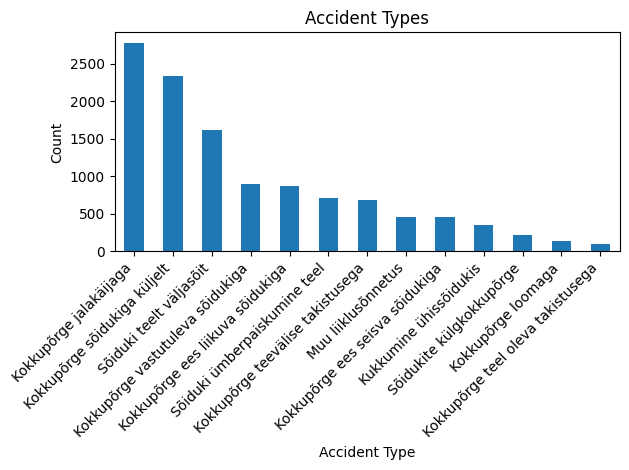

In [15]:
df = dfcopy


df['Liiklusõnnetuse liik [3]'].value_counts().plot(kind='bar')

plt.title('Accident Types')
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

C:\Users\Suts\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


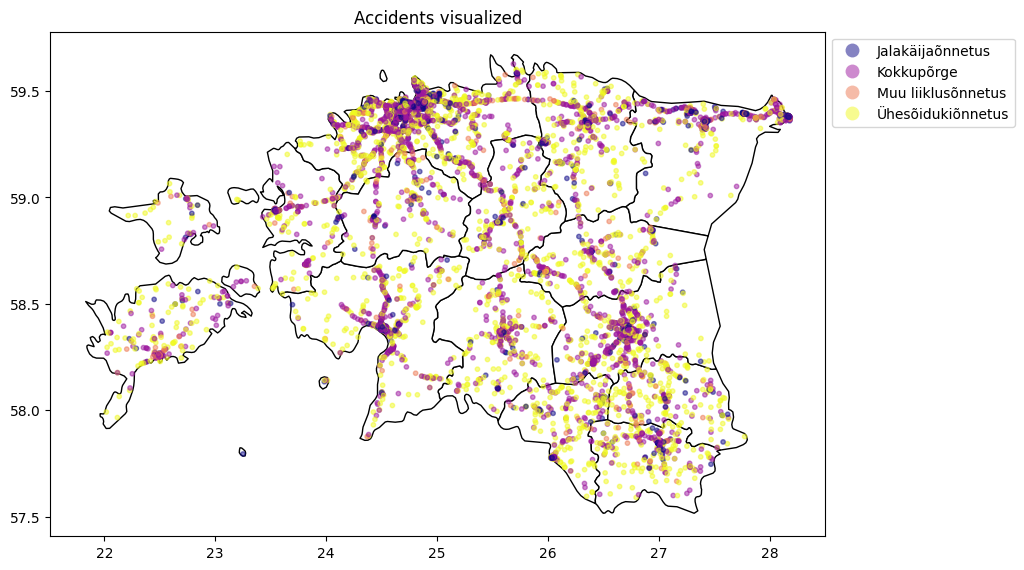

In [16]:
folder_path = 'geop/'
shapefile_path = folder_path + 'ne_10m_admin_1_states_provinces.shp'

boundaries = gpd.read_file(shapefile_path)

estonia = boundaries[boundaries['admin'] == 'Estonia']

accidents_df = df
X_column = 'GPS X'
Y_column = 'GPS Y'

geometry = [Point(xy) for xy in zip(accidents_df[Y_column], accidents_df[X_column])]
geo_df = gpd.GeoDataFrame(accidents_df,geometry=geometry)


# Set the current crs of your geodataframe
geo_df.set_crs(epsg=3301, inplace=True)
# convert the geodataframe to the same crs as the boundaries
geo_df = geo_df.to_crs(epsg=4326)

geo_df_estonia = gpd.sjoin(geo_df, estonia, op='within')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
estonia.plot(ax=ax, color='white', edgecolor='black')
geo_df_estonia.plot(ax=ax, alpha=0.5, column='Liiklusõnnetuse liik [1]', legend=True, legend_kwds={'bbox_to_anchor': (1, 1)}, markersize=10,cmap='plasma')

plt.title("Accidents visualized")
plt.show()


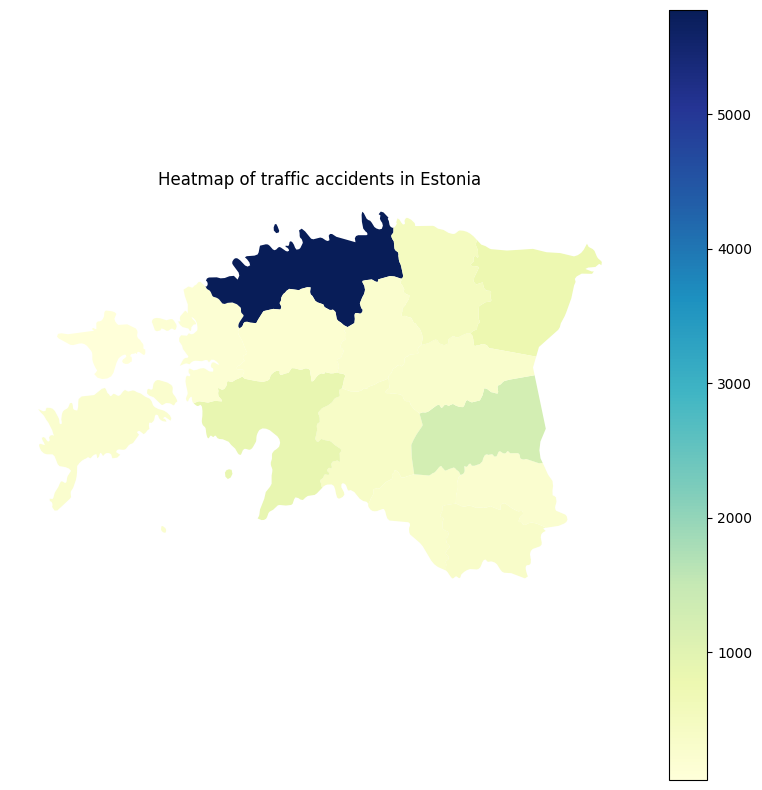

In [17]:
geo_df['Maakond (PPA)'] = geo_df['Maakond (PPA)'].str.replace(' maakond', '')

kokku = geo_df['Maakond (PPA)'].value_counts()

#Merge on index column and name.
estonia = estonia.merge(kokku.rename('õnnetuste_arv'), left_on='name', right_index=True)


fig, ax = plt.subplots(figsize=(10, 10))

estonia.plot(column='õnnetuste_arv', ax=ax, legend=True, cmap='YlGnBu')
plt.title("Heatmap of traffic accidents in Estonia")
plt.axis('off')
plt.savefig('heatmap.pdf') 
plt.show()

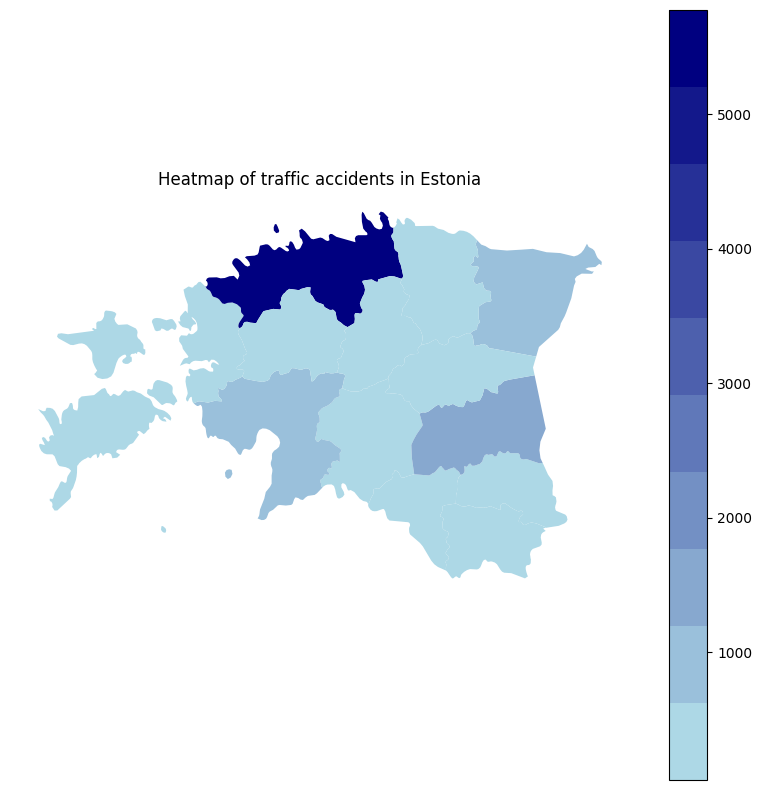

In [18]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.colors as mcolors
hex_colors = ['#ADD8E6', '#000080']  # Light blue to dark blue

# Convert hex to RGB
rgb_colors = [mcolors.hex2color(hex_color) for hex_color in hex_colors]

# Set up a custom colormap from light blue to dark blue
cmap = LinearSegmentedColormap.from_list('custom_blue', rgb_colors, N=10)
# Set up a custom normalization
norm = Normalize(vmin=estonia['õnnetuste_arv'].min(), vmax=estonia['õnnetuste_arv'].max())

fig, ax = plt.subplots(figsize=(10, 10))

# Use the custom colormap and normalization
estonia.plot(column='õnnetuste_arv', ax=ax, legend=True, cmap=cmap, norm=norm)
plt.title("Heatmap of traffic accidents in Estonia")
plt.axis('off')
plt.savefig('heatmap.pdf') 
plt.show()

In [19]:
map_estonia = folium.Map(location=[58.3776, 26.7290], zoom_start=7)

locations = geo_df.geometry.apply(lambda p: [p.y, p.x]).tolist()

HeatMap(locations).add_to(map_estonia)

map_estonia.save('heatmap.html')

In [20]:
# What street/road had the most accidents?

maakond_ja_tänav = df[['Maakond (PPA)','Tänav (PPA)']]
grouped = maakond_ja_tänav.groupby(['Maakond (PPA)', 'Tänav (PPA)']).size().reset_index(name='õnnetuste arv')

idx = grouped.groupby(['Maakond (PPA)'])['õnnetuste arv'].transform(max) == grouped['õnnetuste arv']
result = grouped[idx]
result

C:\Users\Suts\AppData\Local\Temp\ipykernel_9300\2579179511.py:6: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = grouped.groupby(['Maakond (PPA)'])['õnnetuste arv'].transform(max) == grouped['õnnetuste arv']


,Maakond (PPA),Tänav (PPA),õnnetuste arv
472,Harju maakond,Pärnu mnt,281
791,Hiiu maakond,HELTERMAA - KÄRDLA - LUIDJA,14
933,Ida-Viru maakond,TALLINN - NARVA,121
1019,Järva maakond,TALLINN - TARTU - VÕRU - LUHAMAA,62
1089,Jõgeva maakond,TALLINN - TARTU - VÕRU - LUHAMAA,51
1152,Lääne maakond,ÄÄSMÄE - HAAPSALU - ROHUKÜLA,38
1262,Lääne-Viru maakond,TALLINN - NARVA,91
1458,Pärnu maakond,TALLINN - PÄRNU - IKLA,116
1548,Põlva maakond,TARTU - RÄPINA - VÄRSKA,27
1613,Rapla maakond,TALLINN - RAPLA - TÜRI,37


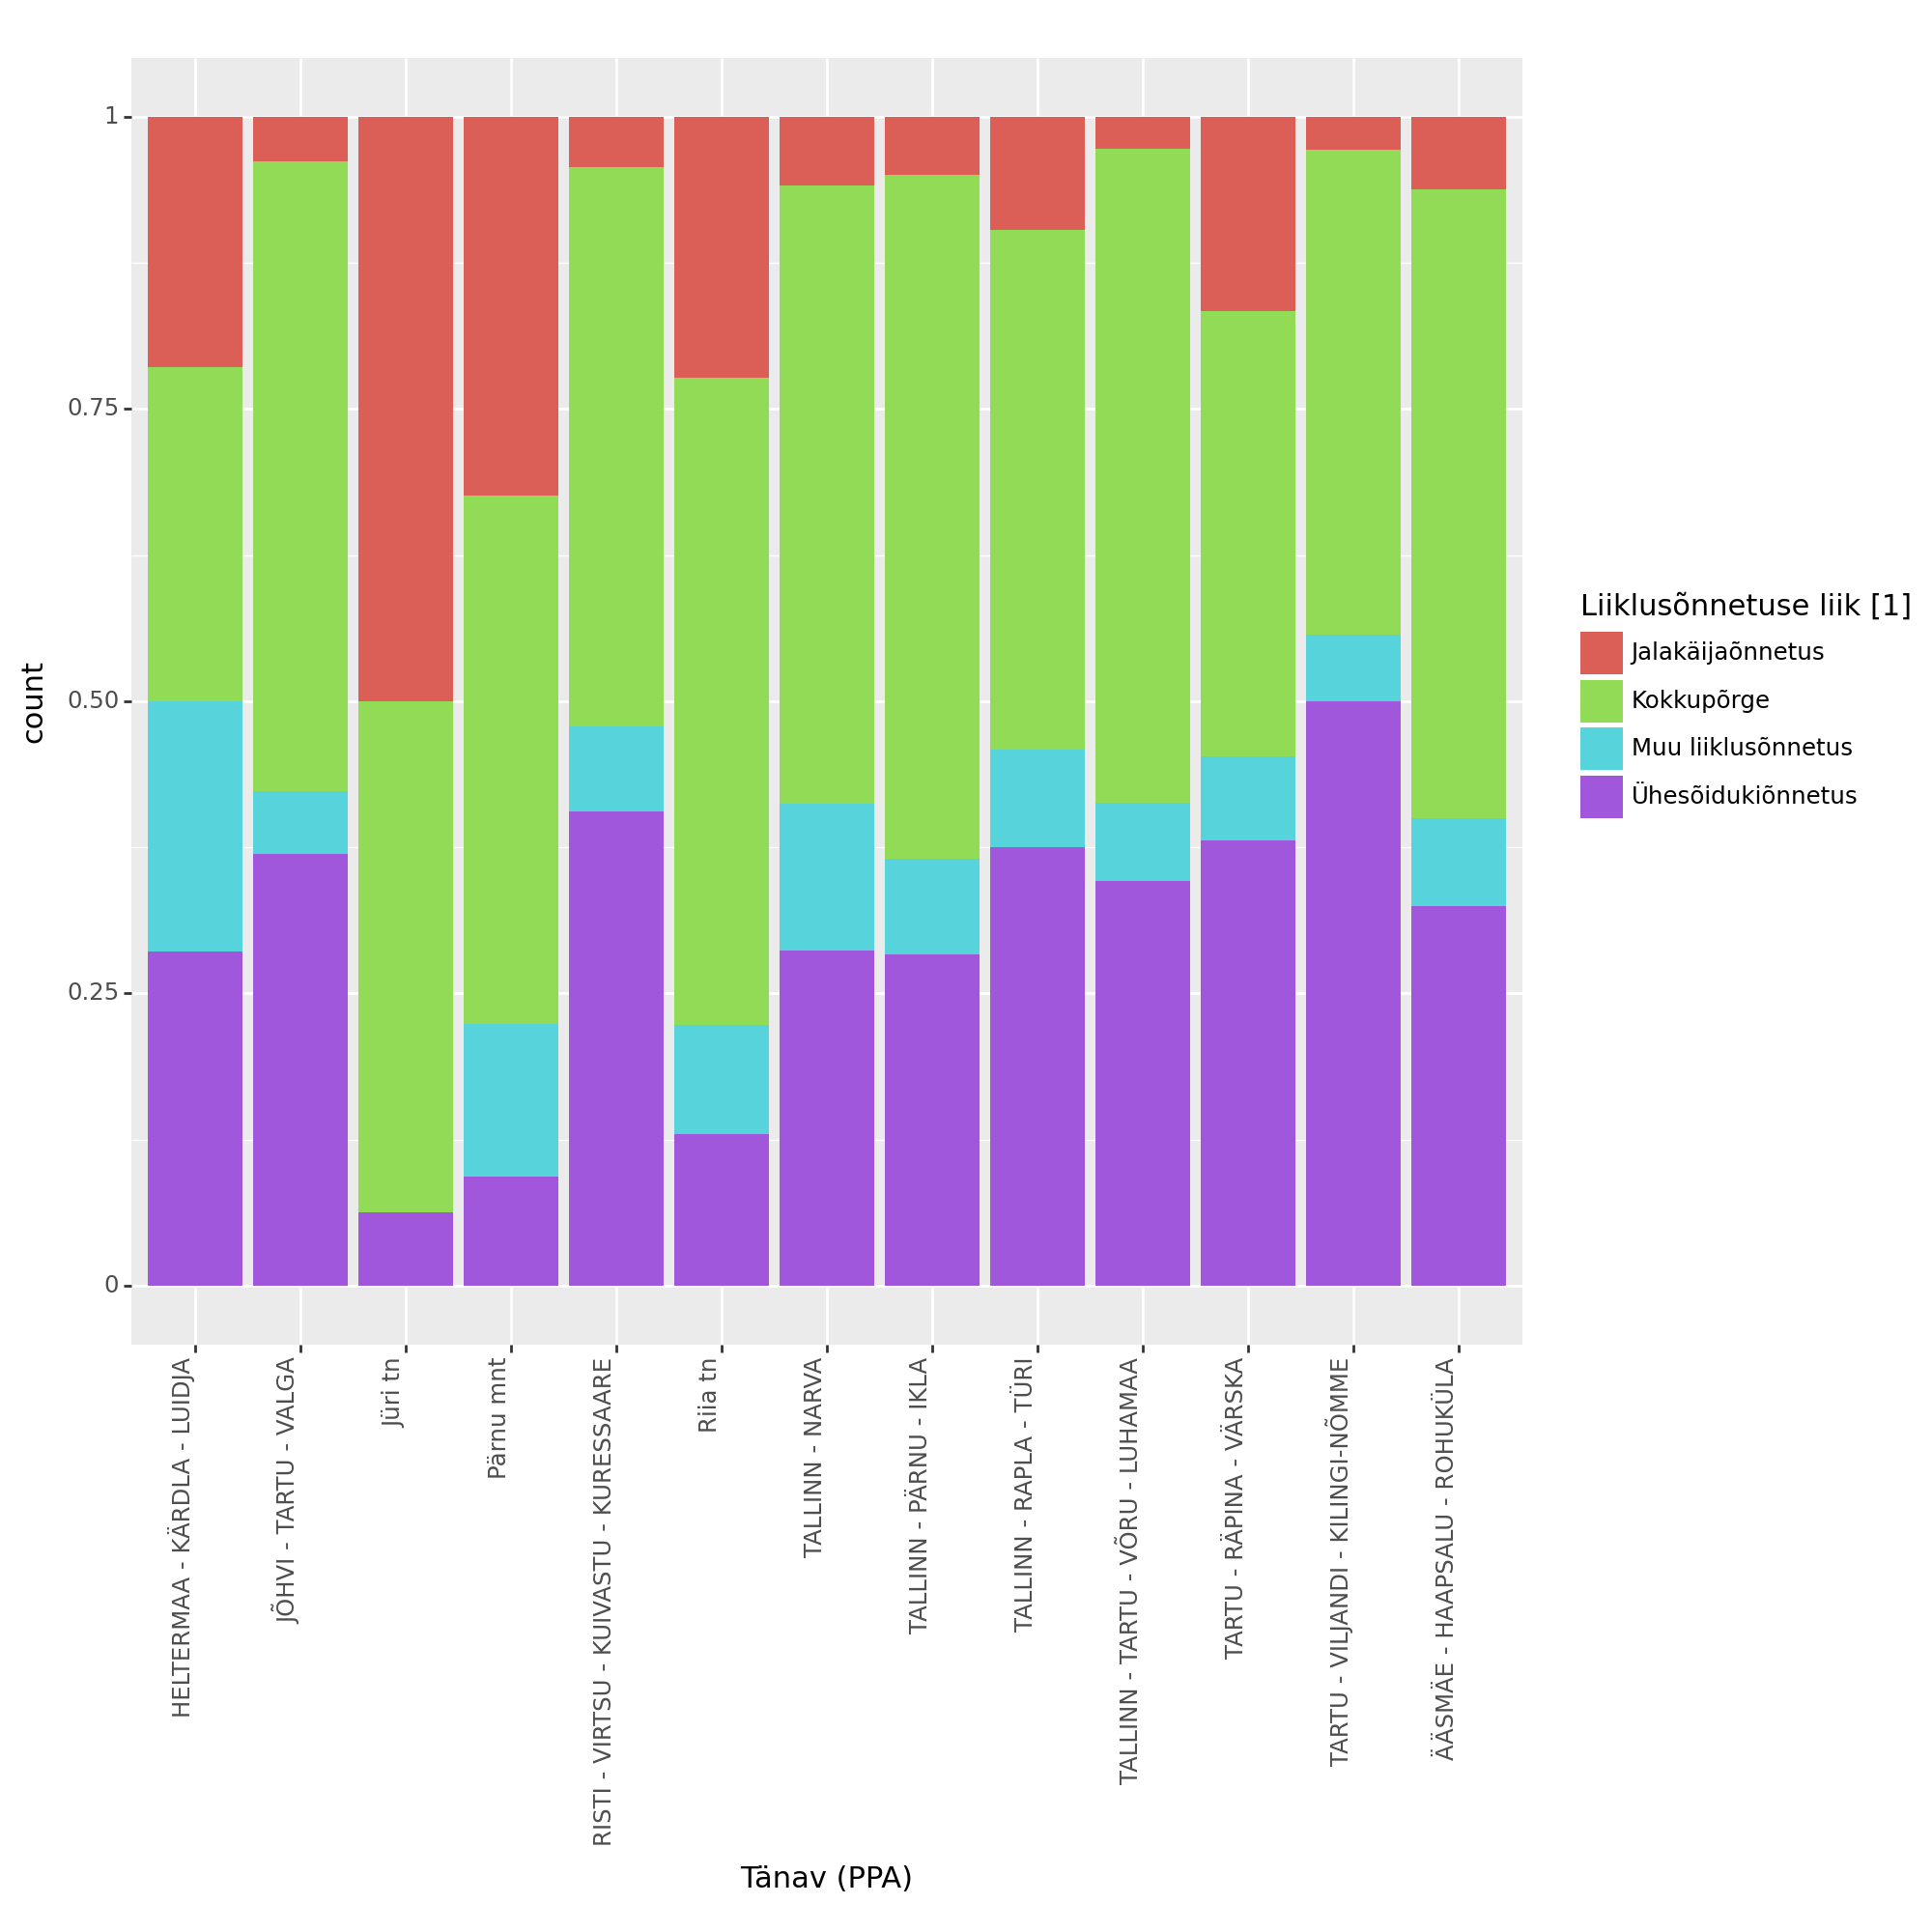

<Figure Size: (1000 x 1000)>

In [21]:
import pandas as pd
import plotnine as p9


selected_streets = ['Pärnu mnt', 'HELTERMAA - KÄRDLA - LUIDJA', 'TALLINN - NARVA',
       'TALLINN - TARTU - VÕRU - LUHAMAA',
       'TALLINN - TARTU - VÕRU - LUHAMAA', 'ÄÄSMÄE - HAAPSALU - ROHUKÜLA',
       'TALLINN - NARVA', 'TALLINN - PÄRNU - IKLA',
       'TARTU - RÄPINA - VÄRSKA', 'TALLINN - RAPLA - TÜRI',
       'RISTI - VIRTSU - KUIVASTU - KURESSAARE', 'Riia tn',
       'JÕHVI - TARTU - VALGA', 'TARTU - VILJANDI - KILINGI-NÕMME',
       'Jüri tn']

# Filter the original DataFrame for the selected streets
selected_data = df[df['Tänav (PPA)'].isin(selected_streets)]


(
    p9.ggplot(
        data = selected_data, 
        mapping = p9.aes(x = 'Tänav (PPA)', fill = 'Liiklusõnnetuse liik [1]')
    ) + 
    p9.geom_bar(position = 'fill') +
    p9.theme(axis_text_x = p9.element_text(angle = 90, hjust = 1))+
    p9.theme(figure_size = (10, 10))
)




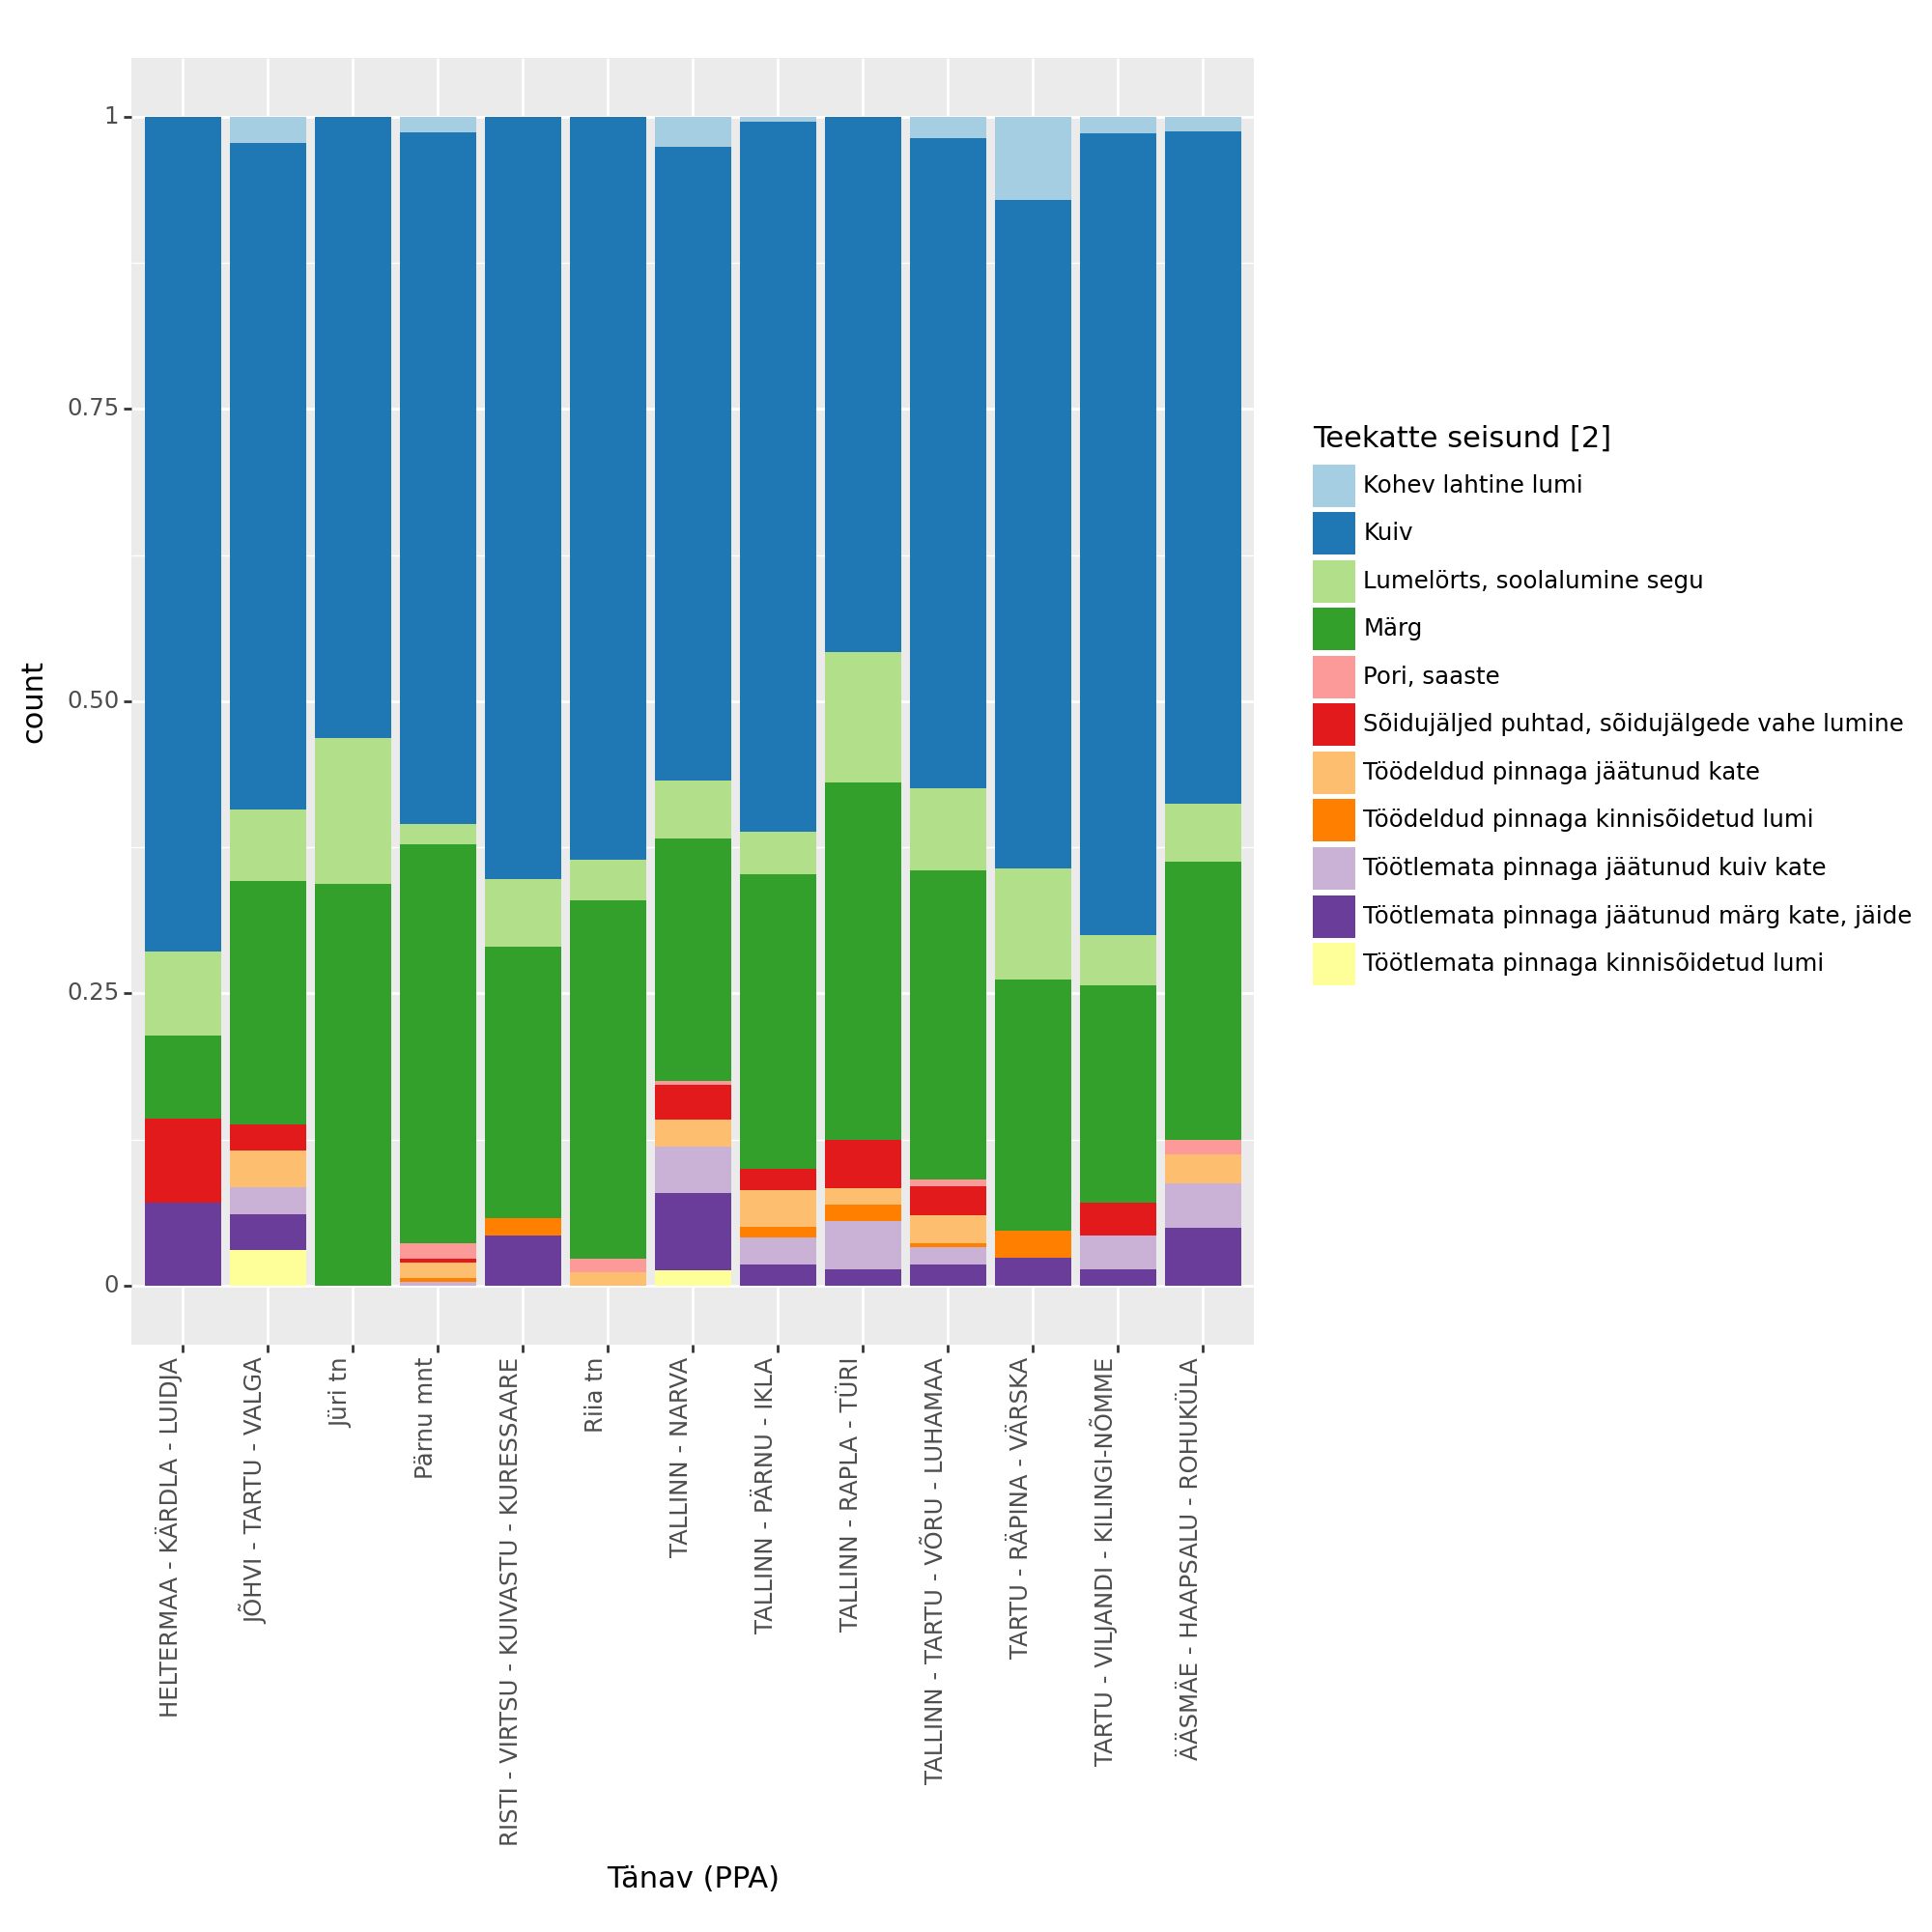

<Figure Size: (1000 x 1000)>

In [22]:

selected_streets = ['Pärnu mnt', 'HELTERMAA - KÄRDLA - LUIDJA', 'TALLINN - NARVA',
       'TALLINN - TARTU - VÕRU - LUHAMAA',
       'TALLINN - TARTU - VÕRU - LUHAMAA', 'ÄÄSMÄE - HAAPSALU - ROHUKÜLA',
       'TALLINN - NARVA', 'TALLINN - PÄRNU - IKLA',
       'TARTU - RÄPINA - VÄRSKA', 'TALLINN - RAPLA - TÜRI',
       'RISTI - VIRTSU - KUIVASTU - KURESSAARE', 'Riia tn',
       'JÕHVI - TARTU - VALGA', 'TARTU - VILJANDI - KILINGI-NÕMME',
       'Jüri tn']

selected_data = df[df['Tänav (PPA)'].isin(selected_streets)]


(
    p9.ggplot(
        data = selected_data, 
        mapping = p9.aes(x = 'Tänav (PPA)', fill = 'Teekatte seisund [2]')
    ) + 
    p9.geom_bar(position = 'fill') +
    p9.scale_fill_brewer(type='qual', palette='Paired') +
    p9.theme(axis_text_x = p9.element_text(angle = 90, hjust = 1))+
    p9.theme(figure_size = (10, 10)) 
    
    
)

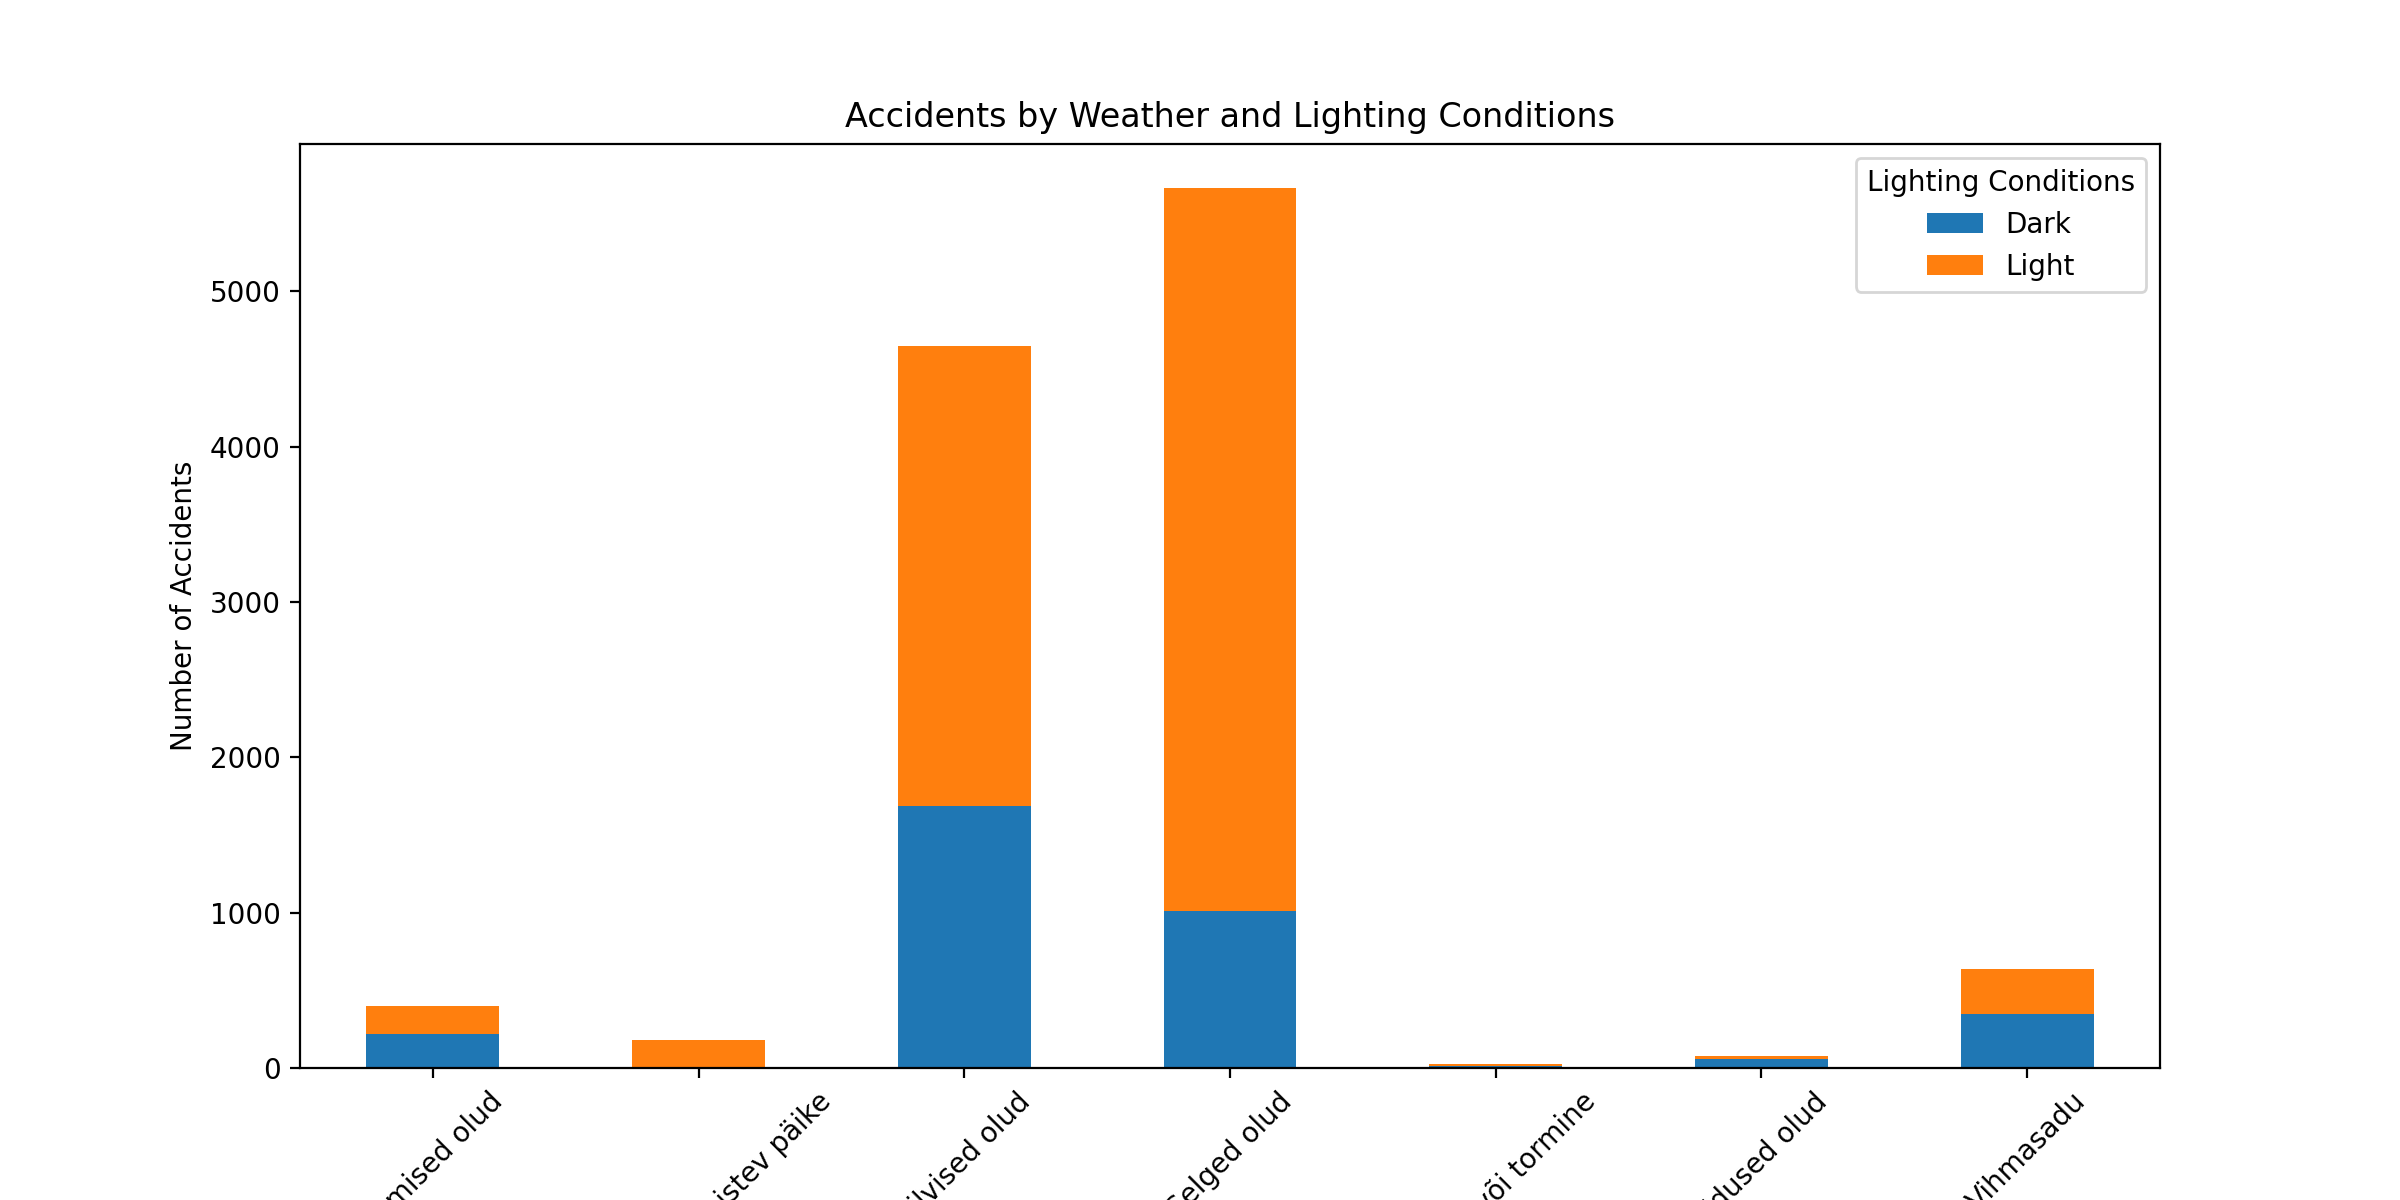

In [23]:
weather_lighting = data.groupby(['Ilmastik [1]', 'Valgustus [1]']).size().reset_index(name='counts')

weather_lighting['Valgustus [1]'] = weather_lighting['Valgustus [1]'].replace({1:'Light', 0:'Dark'})

pivot_data = weather_lighting.pivot(index='Ilmastik [1]', columns='Valgustus [1]', values='counts').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Accidents by Weather and Lighting Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Lighting Conditions")

plt.show()

In [24]:
df.head()

,Toimumisaeg,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Tänav (PPA),Maakond (PPA),Omavalitsus (PPA),Asula,Liiklusõnnetuse liik [1],Liiklusõnnetuse liik [3],Kergliikurijuhi osalusel,Jalakäija osalusel,Kaassõitja osalusel,Maastikusõiduki juhi osalusel,Eaka (65+) mootorsõidukijuhi osalusel,Bussijuhi osalusel,Veoautojuhi osalusel,Ühissõidukijuhi osalusel,Sõiduautojuhi osalusel,Mootorratturi osalusel,Mopeedijuhi osalusel,Jalgratturi osalusel,Alaealise osalusel,Turvavarustust mitte kasutanud isiku osalusel,Esmase juhiloa omaniku osalusel,Mootorsõidukijuhi osalusel,Tüüpskeemi nr,Tüüpskeem [2],Tee tüüp [1],Tee tüüp [2],Tee element [1],Tee element [2],Tee objekt [2],Kurvilisus,Tee tasasus,Tee seisund,Teekate,Teekatte seisund [2],Lubatud sõidukiirus (PPA),Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y
0,24.10.2014 08:45,2.0,0,1,1.0,Estonia pst,Harju maakond,Tallinn,JAH,Jalakäijaõnnetus,Kokkupõrge jalakäijaga,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,104.0,Sõiduki konflikt teelõiku paremalt poolt ületa...,KOV tee/tänav,Tänav,Erielemendita teelõik,Erielemendita teelõik,Rajatis puudub,Sirge tee,Tasane tee,Sõidutee on korras,Püsikate,Kuiv,50.0,Selged olud,Valge aeg,Valge aeg,6588678.0,542647.0
1,24.10.2014 13:45,2.0,0,1,2.0,Kopli tn,Harju maakond,Tallinn,JAH,Kokkupõrge,Kokkupõrge ees liikuva sõidukiga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,401.0,Konflikt samas suunas otse sõitvate sõidukite ...,KOV tee/tänav,Tänav,Ristmik,Y-kujuline ristmik,Reguleerimata ristmik - liiklusmärkidega,Lauge kurv,Tasane tee,Sõidutee on korras,Püsikate,Kuiv,30.0,Pilvised olud,Valge aeg,Valge aeg,6589522.0,541467.0
2,08.11.2014,2.0,0,1,2.0,Merivälja tee,Harju maakond,Tallinn,JAH,Kokkupõrge,Kokkupõrge ees liikuva sõidukiga,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,207.0,Sõiduki konflikt teel või tee serval peatunud ...,KOV tee/tänav,Tänav,Erielemendita teelõik,Erielemendita teelõik,Rajatis puudub,Sirge tee,Tasane tee,Sõidutee on korras,Püsikate,Kuiv,50.0,Pilvised olud,Valge aeg,Valge aeg,6593961.0,547646.0
3,17.11.2014 17:32,2.0,0,2,2.0,KEILA - HAAPSALU,Harju maakond,Lääne-Harju vald,EI,Kokkupõrge,Kokkupõrge vastutuleva sõidukiga,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,606.0,Ristmikul kõrvalteelt peateele parempööret soo...,Riigitee,Tugimaantee,Ristmik,T-kujuline ristmik,Reguleerimata ristmik – liiklusmärkideta,Lauge kurv,Tasane tee,Sõidutee on korras,Püsikate,Kuiv,90.0,Pilvised olud,Pimeda aeg,Pimeda ajal valgustus ei põle,6569324.0,516628.0
4,28.04.2015 07:55,2.0,0,1,2.0,Pärnu mnt,Harju maakond,Tallinn,JAH,Kokkupõrge,Kokkupõrge sõidukiga küljelt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,505.0,Ristmikul peateelt kõrvalteele parempööret soo...,KOV tee/tänav,Tänav,Ristmik,T-kujuline ristmik,Reguleerimata ristmik - liiklusmärkidega,Sirge tee,Tasane tee,Sõidutee on korras,Püsikate,Märg,50.0,Vihmasadu,Valge aeg,Valge aeg,6586430.0,541953.0


In [25]:
# siin peaks tegelt veel mingeid asju uurima  nt ilmastikuga aga mul on koik ideed otsas juba
# ja plotidle legendid ja pealkirjad vaja ka panna hiljem

# Exploring accidents across different demographic factors

In [26]:

fatal_accident_count = (df['Hukkunuid'] != 0).sum()

accident_w_injuries_count = (df['Vigastatuid'] != 0).sum()
print(f"Number of accidents with fatalities: {fatal_accident_count}\n")
print(f"Number of accidents with injuries: {accident_w_injuries_count}\n")

fatal_accidents_no_safety_equipment = ((df['Turvavarustust mitte kasutanud isiku osalusel'] == 1) & (df['Hukkunuid'] != 0)).sum()

print(f"Number of fatal accidents where safety equipment was not used by at least one person: {fatal_accidents_no_safety_equipment}\n")

accident_w_injuries_no_safety_equipment = ((df['Turvavarustust mitte kasutanud isiku osalusel'] == 1) & (df['Vigastatuid'] != 0)).sum()

print(f"Number of accidents with injuries where safety equipment was not used by at least one person: {accident_w_injuries_no_safety_equipment}")

Number of accidents with fatalities: 527

Number of accidents with injuries: 11244

Number of fatal accidents where safety equipment was not used by at least one person: 106

Number of accidents with injuries where safety equipment was not used by at least one person: 1251


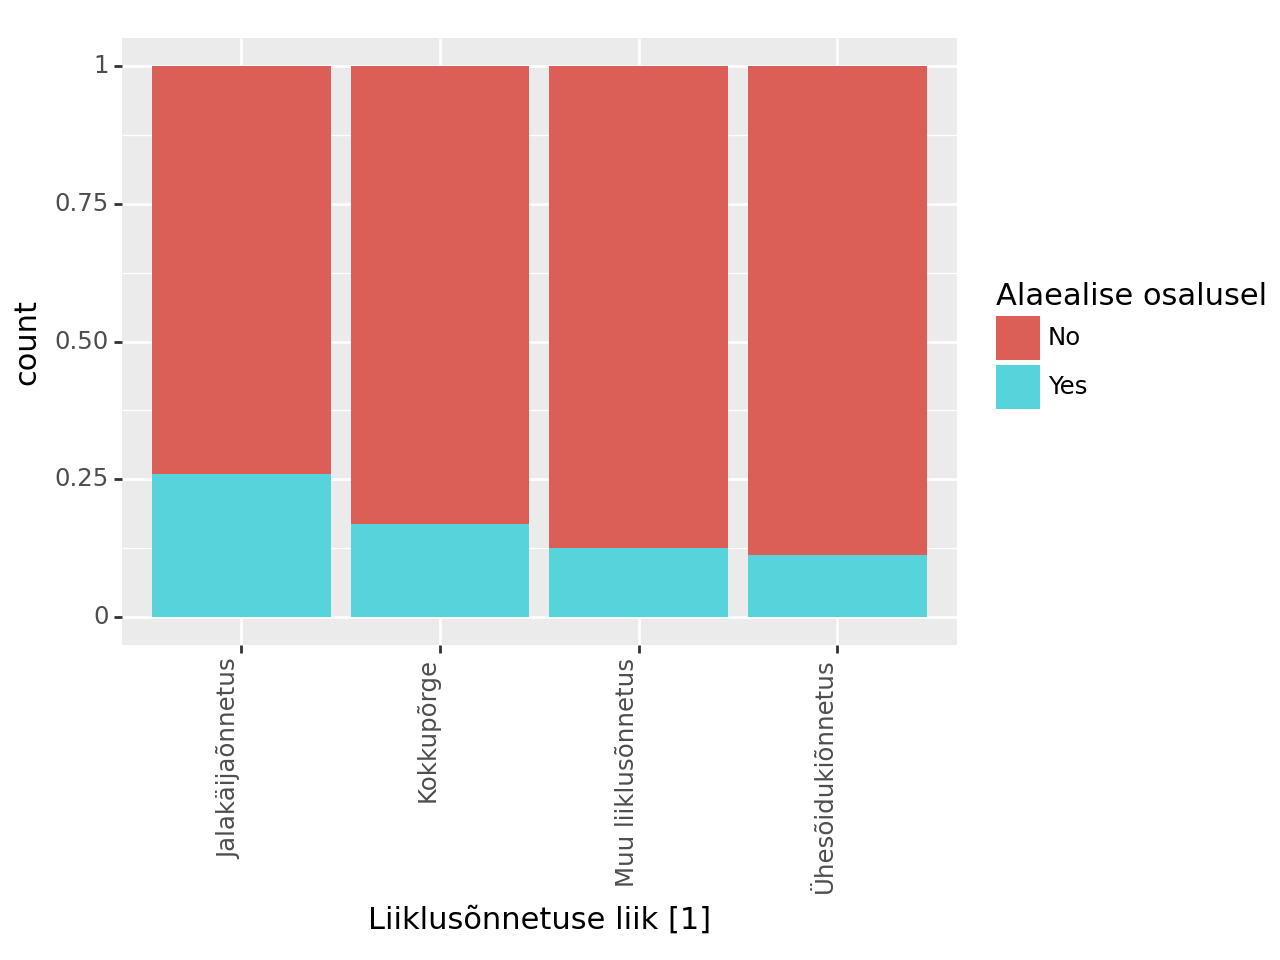

<Figure Size: (640 x 480)>

In [27]:
df['Alaealise osalusel'] = df['Alaealise osalusel'].replace({1: 'Yes', 0: 'No'})


(
p9.ggplot(
    data = df, 
    mapping = p9.aes(x = 'Liiklusõnnetuse liik [1]', fill = 'Alaealise osalusel')
 )+ 
    p9.geom_bar(position = 'fill')+ p9.theme(axis_text_x = p9.element_text(angle = 90, hjust = 1))
)

In [28]:
df = dfcopy

In [29]:

too_much_missing=['GPS X','GPS Y','Toimumisaeg','Tüüpskeemi nr','Lubatud sõidukiirus (PPA)','Isikuid','Hukkunuid','Vigastatuid','Sõidukeid']
df.drop(columns=too_much_missing, inplace=True)
columns_to_encode = ['Liiklusõnnetuse liik [1]','Liiklusõnnetuse liik [3]','Tänav (PPA)', 'Maakond (PPA)', 'Omavalitsus (PPA)','Tüüpskeem [2]', 'Tee tüüp [1]', 'Tee tüüp [2]','Tee element [1]', 'Tee element [2]', 'Tee objekt [2]', 'Kurvilisus','Tee tasasus', 'Tee seisund', 'Teekate', 'Teekatte seisund [2]', 'Ilmastik [1]', 'Valgustus [1]','Valgustus [2]']
data_encoded = pd.get_dummies(df, columns=columns_to_encode)

data_encoded['Asula'] = data_encoded['Asula'].replace({'JAH': 1, 'EI': 0})




In [30]:
data_encoded['Alaealise osalusel'] = data_encoded['Alaealise osalusel'].replace({'Yes': 1, 'No': 0})
data_types = data_encoded.dtypes.unique()
print(data_types)
data_encoded.head()



[dtype('int64') dtype('float64') dtype('bool')]


Asula  Kergliikurijuhi osalusel  Jalakäija osalusel  Kaassõitja osalusel  \
0      1                       0.0                 1.0                  0.0   
1      1                       0.0                 0.0                  0.0   
2      1                       0.0                 0.0                  0.0   
3      0                       0.0                 0.0                  1.0   
4      1                       0.0                 0.0                  0.0   

   Maastikusõiduki juhi osalusel  Eaka (65+) mootorsõidukijuhi osalusel  \
0                            0.0                                    0.0   
1                            0.0                                    0.0   
2                            0.0                                    0.0   
3                            0.0                                    0.0   
4                            0.0                                    0.0   

   Bussijuhi osalusel  Veoautojuhi osalusel  Ühissõidukijuhi osalusel  \
0                 1.0                   0.0                       1.0   
1                 0.0                   0.0                       0.0   
2                 1.0                   0.0                       1.0   
3                 0.0                   0.0                       0.0   
4                 0.0                   0.0                       0.0   

   Sõiduautojuhi osalusel  Mootorratturi osalusel  Mopeedijuhi osalusel  \
0                     0.0                     0.0                   0.0   
1                     1.0                     0.0                   0.0   
2                     1.0                     0.0                   0.0   
3                     1.0                     0.0                   0.0   
4                     1.0                     0.0                   0.0   

   Jalgratturi osalusel  Alaealise osalusel  \
0                   0.0                   0   
1                   0.0                   0   
2                   0.0                   0   
3                   0.0                   0   
4                   1.0                   0   

   Turvavarustust mitte kasutanud isiku osalusel  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   

   Esmase juhiloa omaniku osalusel  Mootorsõidukijuhi osalusel  \
0                              0.0                         1.0   
1                              0.0                         1.0   
2                              0.0                         1.0   
3                              0.0                         1.0   
4                              0.0                         1.0   

   Liiklusõnnetuse liik [1]_Jalakäijaõnnetus  \
0                                       True   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   Liiklusõnnetuse liik [1]_Kokkupõrge  \
0                                False   
1                                 True   
2                                 True   
3                                 True   
4                                 True   

   Liiklusõnnetuse liik [1]_Muu liiklusõnnetus  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Liiklusõnnetuse liik [1]_Ühesõidukiõnnetus  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Liiklusõnnetuse liik [3]_Kokkupõrge ees liikuva sõidu

In [31]:
# ei tulnud ka midagi kasulikku aga äkki peaks tulpi vähemaks võtma enne
from mlxtend.frequent_patterns import apriori, association_rules
# Set a minimum support threshold (e.g., 0.2)
min_support = 0.2
# Use Apriori to find frequent itemsets
frequent_itemsets = apriori(data_encoded, min_support=min_support, use_colnames=True)
# Set a minimum confidence threshold (e.g., 0.7)
min_confidence = 0.7
# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)


ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
print("Frequent Itemsets:")
sorted_frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 1].sort_values(by='support', ascending=False)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  

sorted_frequent_itemsets

In [ ]:
print("Association Rules:")
rules